<center><img src="https://universodiscreto.com/circle-ud.png"/></center>

# 1. Teoria

## 1.1 Imports

In [12]:
import numpy as np
import cv2

## 1.2 Funções para exibir imagem em grid

In [13]:
import matplotlib.pyplot as plt


def showSingleImage(img, title, size, mincolor=0, maxcolor=255):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y, mincolor=0, maxcolor=255):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, cmap='gray', vmin=mincolor, vmax=maxcolor)
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

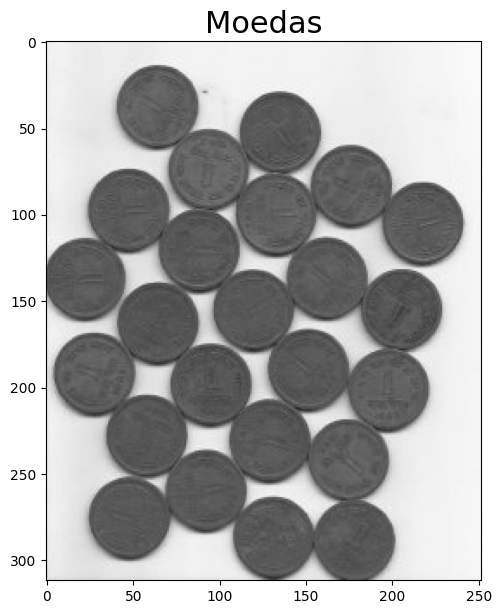

In [14]:
img_moedas = cv2.imread("coins.jpg", 0)
showSingleImage(img_moedas, "Moedas", (7, 7))

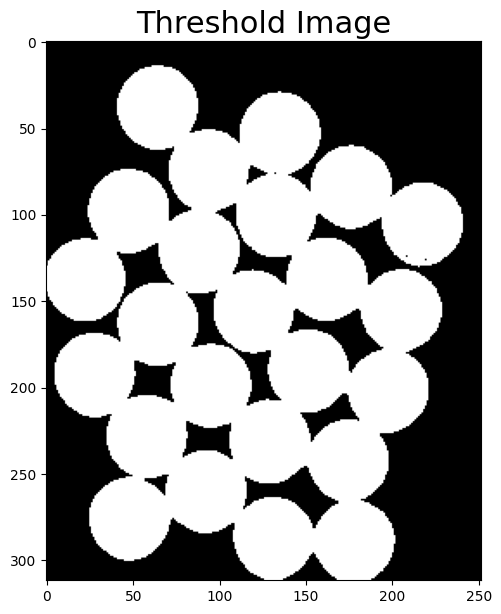

In [15]:
threshold, img_thresh = cv2.threshold(img_moedas, 127, 255, cv2.THRESH_BINARY_INV)
showSingleImage(img_thresh, "Threshold Image", (7, 7))

## 1.3 Operações Morfológicas

### 1.3.1 Erosão

Muito útil para:
* Separar objetos conectados (como as moedas acima)
* Deixar contornos mais suaves

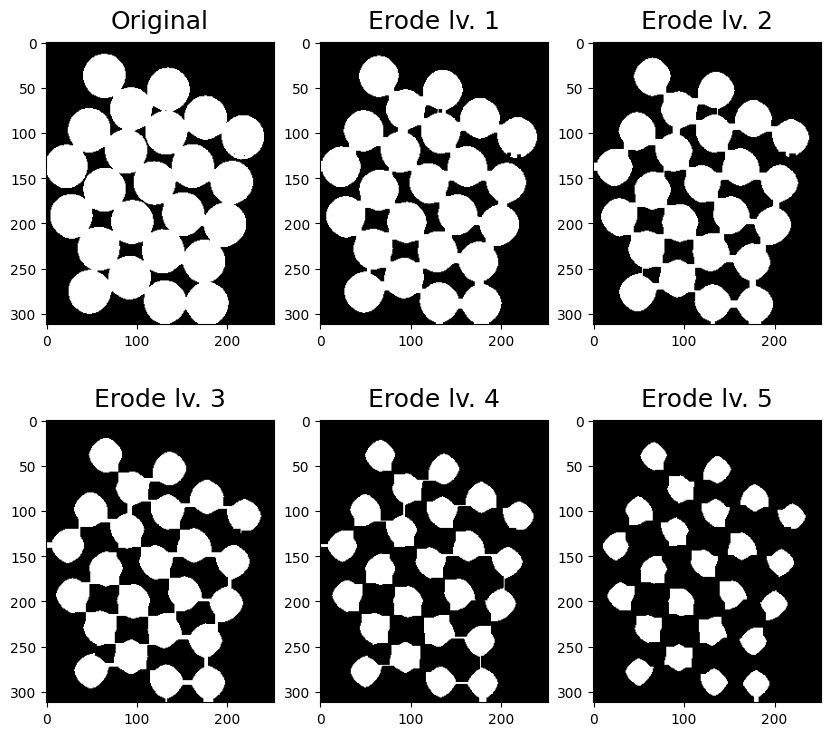

In [16]:
#exemplo separando objetos conectados
kernel = np.ones((4, 4), np.uint8)

img_moedas_erode1 = cv2.erode(img_thresh, kernel, iterations=1)
img_moedas_erode2 = cv2.erode(img_thresh, kernel, iterations=2)
img_moedas_erode3 = cv2.erode(img_thresh, kernel, iterations=3)
img_moedas_erode4 = cv2.erode(img_thresh, kernel, iterations=4)
img_moedas_erode5 = cv2.erode(img_thresh, kernel, iterations=5)

imgsArray = [img_thresh, img_moedas_erode1, img_moedas_erode2, img_moedas_erode3, img_moedas_erode4, img_moedas_erode5]
titlesArray = ['Original', 'Erode lv. 1', 'Erode lv. 2', 'Erode lv. 3', 'Erode lv. 4', 'Erode lv. 5']
showMultipleImages(imgsArray, titlesArray, (10, 9), 3, 2)

### 1.3.2 Dilatação

Muito útil para:
* Reparar quebras
* Reparar intrusões

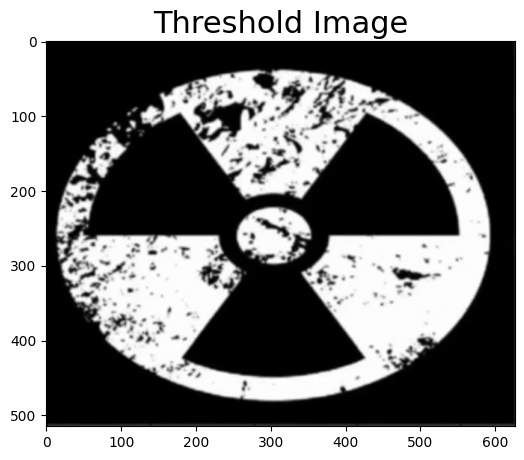

In [18]:
img_nuclear = cv2.imread("nuclear.png", 0)
showSingleImage(img_nuclear, "Threshold Image", (7, 5))

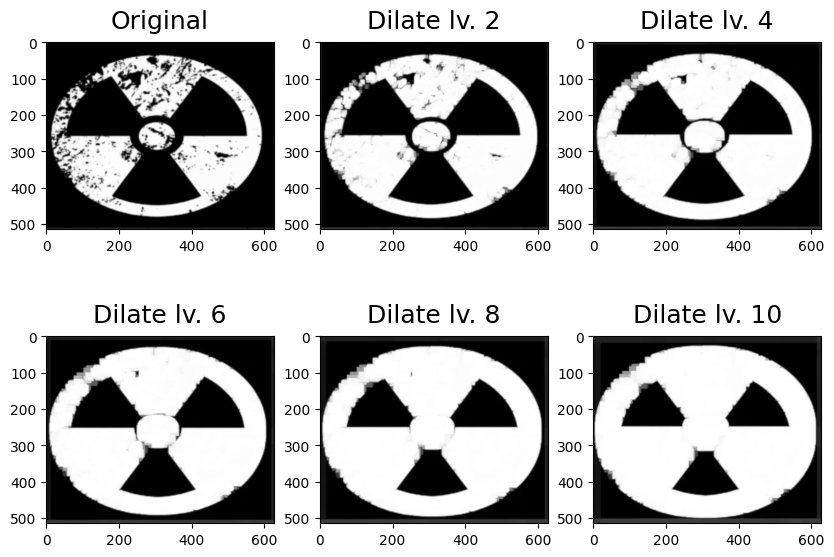

In [19]:
kernel = np.ones((4, 4), np.uint8)

img_nuclear_dil2 = cv2.dilate(img_nuclear, kernel, iterations=2)
img_nuclear_dil4 = cv2.dilate(img_nuclear, kernel, iterations=4)
img_nuclear_dil6 = cv2.dilate(img_nuclear, kernel, iterations=6)
img_nuclear_dil8 = cv2.dilate(img_nuclear, kernel, iterations=8)
img_nuclear_dil10 = cv2.dilate(img_nuclear, kernel, iterations=10)

imgsArray = [img_nuclear, img_nuclear_dil2, img_nuclear_dil4, img_nuclear_dil6, img_nuclear_dil8, img_nuclear_dil10]
titlesArray = ['Original', 'Dilate lv. 2', 'Dilate lv. 4', 'Dilate lv. 6', 'Dilate lv. 8', 'Dilate lv. 10']
showMultipleImages(imgsArray, titlesArray, (10, 7), 3, 2)

### 1.3.3 Abertura

Muito útil para:
* Remoção de pequenos ruídos

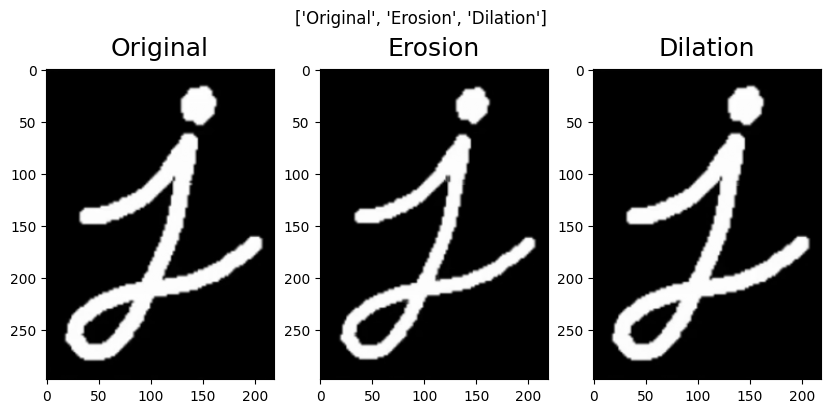

In [21]:
#imagem original
img_j_original = cv2.imread("j.png", 0)

#mesma imagem com erosão
kernel = np.ones((3,3),np.uint8)
erosion =  cv2.erode(img_j_original, kernel, iterations=1)

#imagem anterior com dilatação aplicada
dilation =  cv2.dilate(erosion, kernel, iterations=1)

imgsArray = [img_j_original, erosion, dilation]
titlesArray = ['Original', 'Erosion', 'Dilation']
showMultipleImages(imgsArray, titlesArray, (10, 6), 3, 1)

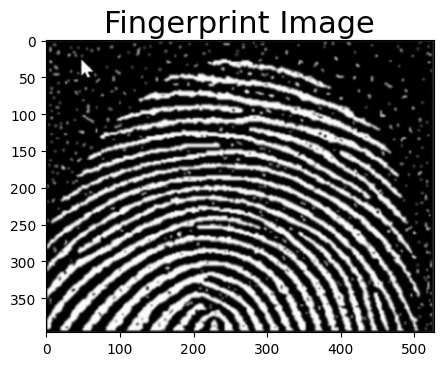

In [23]:
img_impr_digital = cv2.imread("fingerprint.png", 0)
showSingleImage(img_impr_digital, "Fingerprint Image", (5, 5))

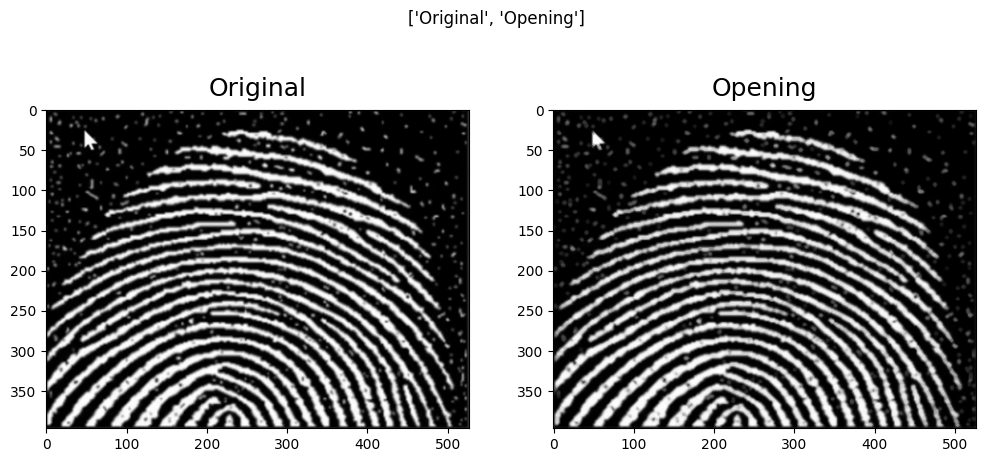

In [24]:
kernel = np.array([[0,1,1,0], [1,1,1,1],[0,1,1,0]], np.uint8)

img_impr_open = cv2.morphologyEx(img_impr_digital, cv2.MORPH_OPEN, kernel)

imgsArray = [img_impr_digital, img_impr_open]
titlesArray = ['Original', 'Opening']
showMultipleImages(imgsArray, titlesArray, (12, 10), 2, 1)

### 1.3.4 Fechamento

Muito útil para:
* Fechar pequenos buracos

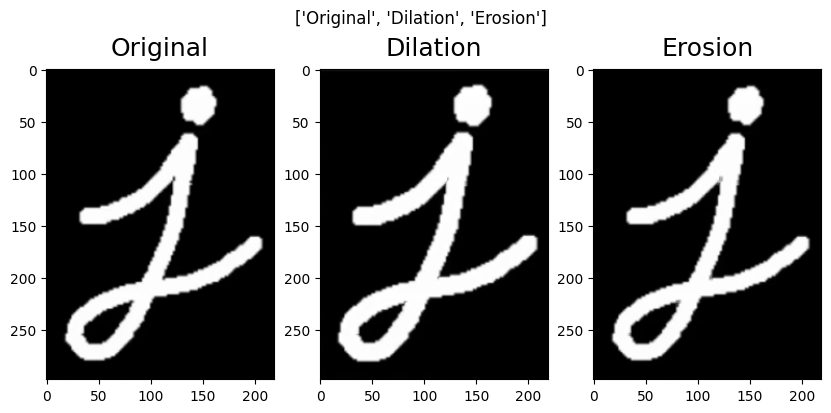

In [25]:
#imagem original
img_j_original = cv2.imread("j.png", 0)

#mesma imagem com dilatação
kernel = np.ones((3,3),np.uint8)
dilation =  cv2.dilate(img_j_original, kernel, iterations=1)

#imagem anterior com erosão aplicada
erosion =  cv2.erode(dilation, kernel, iterations=1)

imgsArray = [img_j_original, dilation, erosion]
titlesArray = ['Original', 'Dilation', 'Erosion']
showMultipleImages(imgsArray, titlesArray, (10, 6), 3, 1)

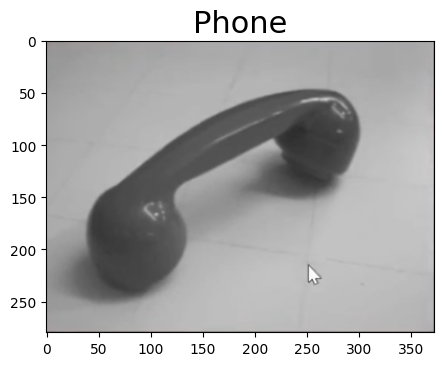

In [27]:
img_phone = cv2.imread("phone.png")
showSingleImage(img_phone, "Phone", (5, 5))

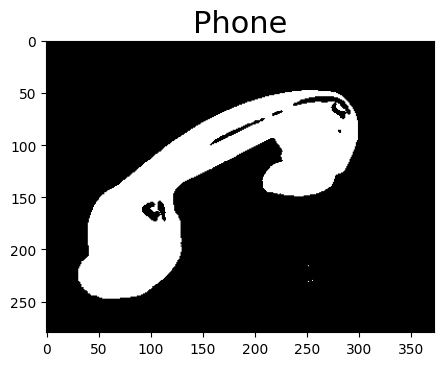

In [28]:
threshold, img_thresh = cv2.threshold(img_phone, 100, 255, cv2.THRESH_BINARY_INV)
showSingleImage(img_thresh, "Phone", (5, 5))

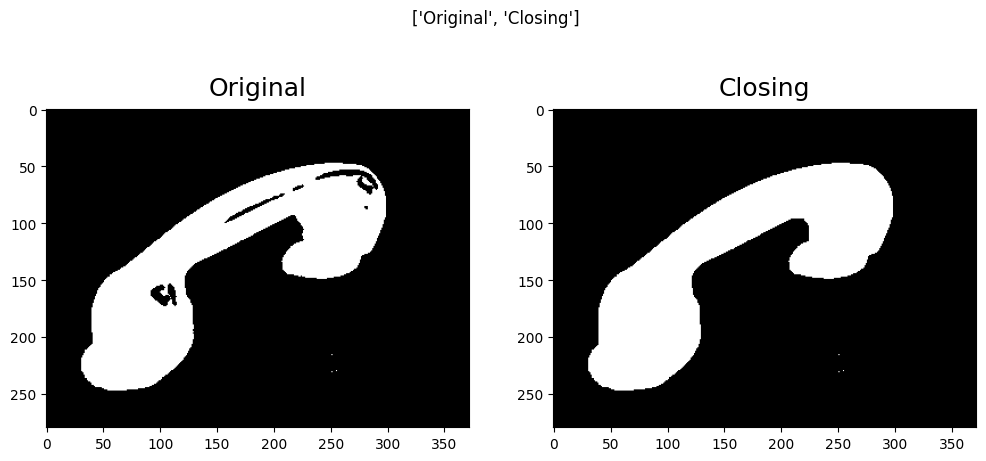

In [29]:
kernel = np.ones((11,11),np.uint8)

img_phone_close = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel)

imgsArray = [img_thresh, img_phone_close]
titlesArray = ['Original', 'Closing']
showMultipleImages(imgsArray, titlesArray, (12, 10), 2, 1)

# Gradiente Morfológico

* Diferença entre dilatação e erosão da imagem
* Útil para realçar contornos de uma imagem

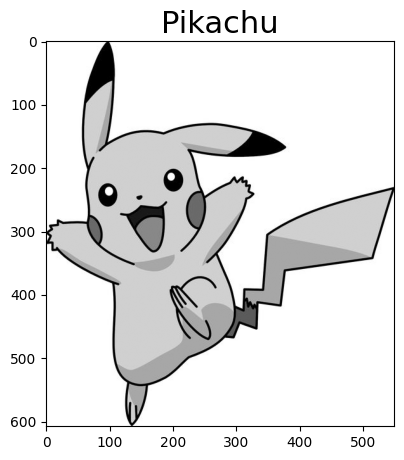

In [30]:
pikachu = cv2.imread("pikachu.jpg", 0)
showSingleImage(pikachu, "Pikachu", (5, 5))

In [40]:
kernel = np.ones((2 q,2),np.uint8)
gradient = cv2.morphologyEx(pikachu, cv2.MORPH_GRADIENT, kernel)

showSingleImage(gradient, "Pikachu Gradient", (5, 5))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1813286743.py, line 1)

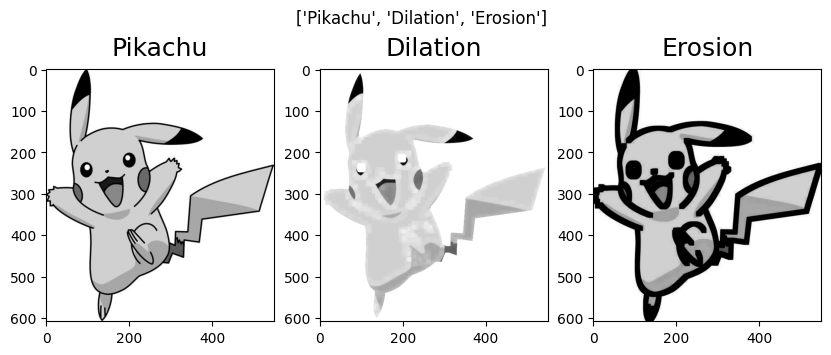

In [32]:
#mesma imagem com dilatação
dilation =  cv2.dilate(pikachu, np.ones((10,10),np.uint8), iterations=1)

#imagem anterior com erosão aplicada
erosion =  cv2.erode(pikachu, np.ones((10,10),np.uint8), iterations=1)

imgsArray = [pikachu, dilation, erosion]
titlesArray = ['Pikachu', 'Dilation', 'Erosion']
showMultipleImages(imgsArray, titlesArray, (10, 6), 3, 1)

# Top Hat

* Diferença entre imagem original (preto e branco) e um filtro de abertura
* Útil para identificar regiões muito claras da imagem

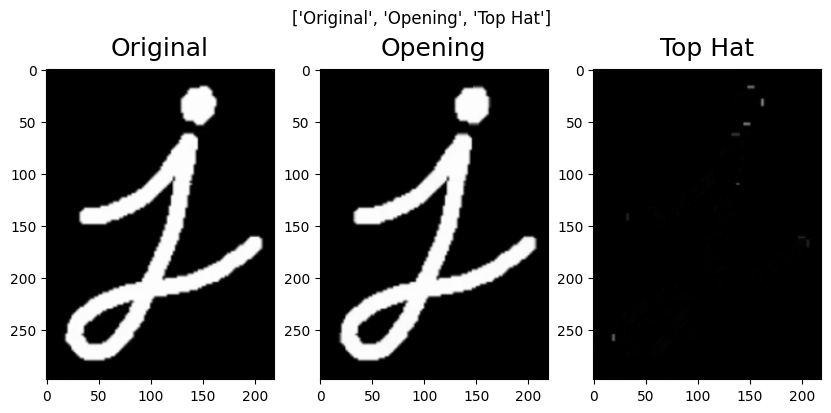

In [33]:
#imagem original
img_j_original = cv2.imread("j.png", 0)

#mesma imagem com filtro de abertura
kernel = np.ones((9,9),np.uint8)
img_j_opening = cv2.morphologyEx(img_j_original, cv2.MORPH_OPEN, kernel)

#imagem com filtro top hat
img_j_tophat = cv2.morphologyEx(img_j_original, cv2.MORPH_TOPHAT, kernel)

imgsArray = [img_j_original, img_j_opening, img_j_tophat]
titlesArray = ['Original', 'Opening', 'Top Hat']
showMultipleImages(imgsArray, titlesArray, (10, 6), 3, 1)

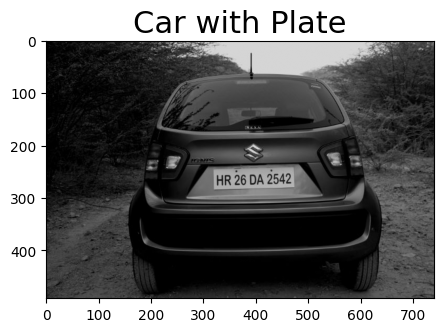

In [34]:
img_car = cv2.imread("car.jpg", 0)
showSingleImage(img_car, "Car with Plate", (5, 5))

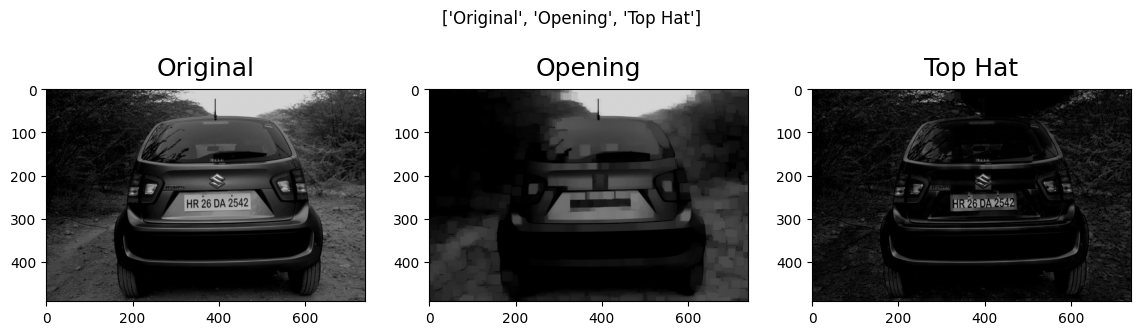

In [35]:
#mesma imagem com filtro de abertura
img_car_opening = cv2.morphologyEx(img_car, cv2.MORPH_OPEN, np.ones((15,15),np.uint8))

#imagem com filtro top hat
img_car_tophat = cv2.morphologyEx(img_car, cv2.MORPH_TOPHAT, np.ones((15,15),np.uint8))

imgsArray = [img_car, img_car_opening, img_car_tophat]
titlesArray = ['Original', 'Opening', 'Top Hat']
showMultipleImages(imgsArray, titlesArray, (14, 8), 3, 1)

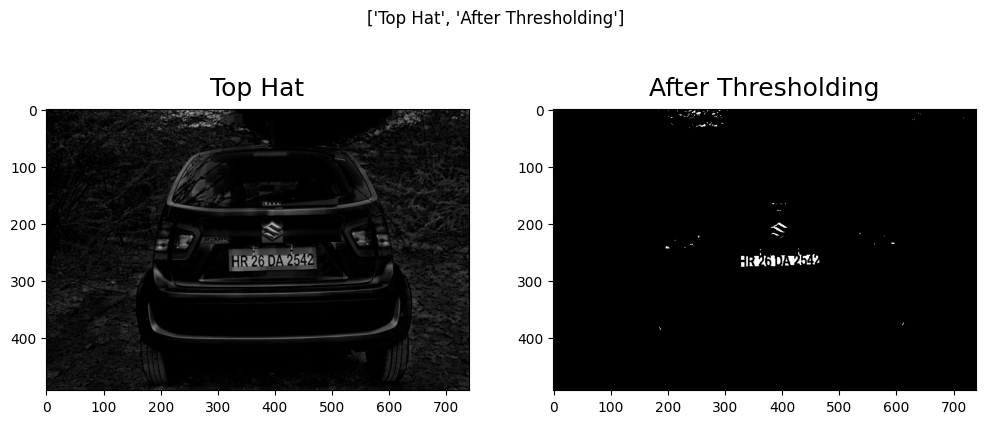

In [36]:
threshold, only_plate = cv2.threshold(img_car_tophat, 127, 255, cv2.THRESH_BINARY)

imgsArray = [img_car_tophat, only_plate]
titlesArray = ['Top Hat', 'After Thresholding']
showMultipleImages(imgsArray, titlesArray, (12, 10), 2, 1)

# Black Hat

* Diferença entre imagem original (preto e branco) e um filtro de fechamento
* Útil para identificar regiões muito escuras da imagem

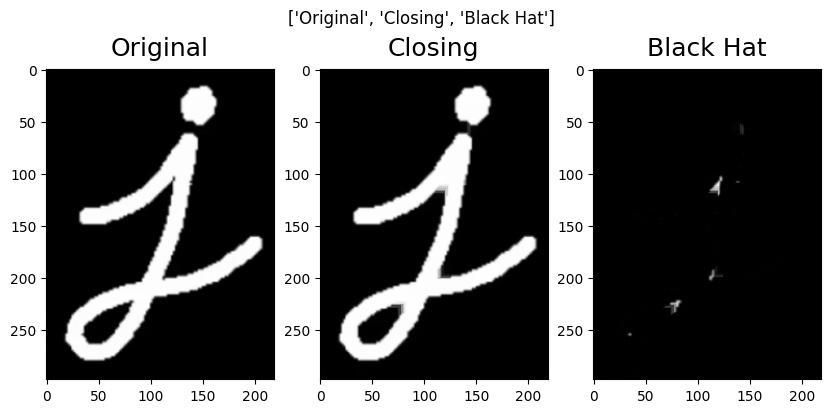

In [37]:
#imagem original
img_j_original = cv2.imread("j.png", 0)

#mesma imagem com filtro de fechamento
kernel = np.ones((9,9),np.uint8)
img_j_opening = cv2.morphologyEx(img_j_original, cv2.MORPH_CLOSE, kernel)

#imagem com filtro top hat
img_j_tophat = cv2.morphologyEx(img_j_original, cv2.MORPH_BLACKHAT, kernel)

imgsArray = [img_j_original, img_j_opening, img_j_tophat]
titlesArray = ['Original', 'Closing', 'Black Hat']
showMultipleImages(imgsArray, titlesArray, (10, 6), 3, 1)

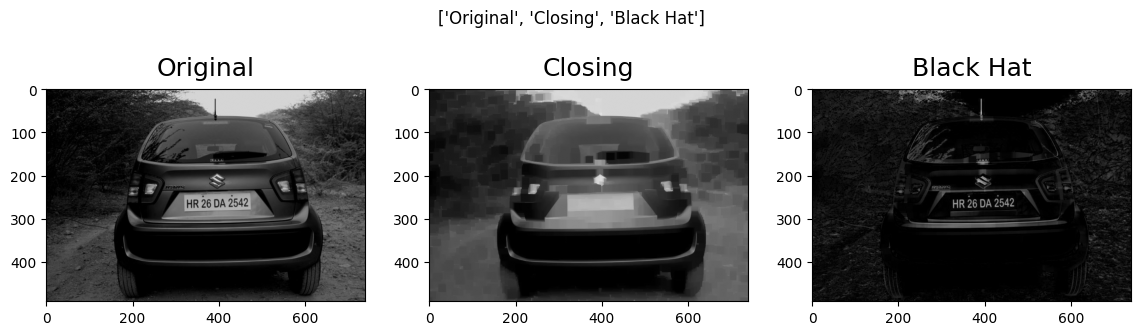

In [38]:
#mesma imagem com filtro de fechamento
img_car_closing = cv2.morphologyEx(img_car, cv2.MORPH_CLOSE, np.ones((15,15),np.uint8))

#imagem com filtro black hat
img_car_blackhat = cv2.morphologyEx(img_car, cv2.MORPH_BLACKHAT, np.ones((15,15),np.uint8))

imgsArray = [img_car, img_car_closing, img_car_blackhat]
titlesArray = ['Original', 'Closing', 'Black Hat']
showMultipleImages(imgsArray, titlesArray, (14, 8), 3, 1)

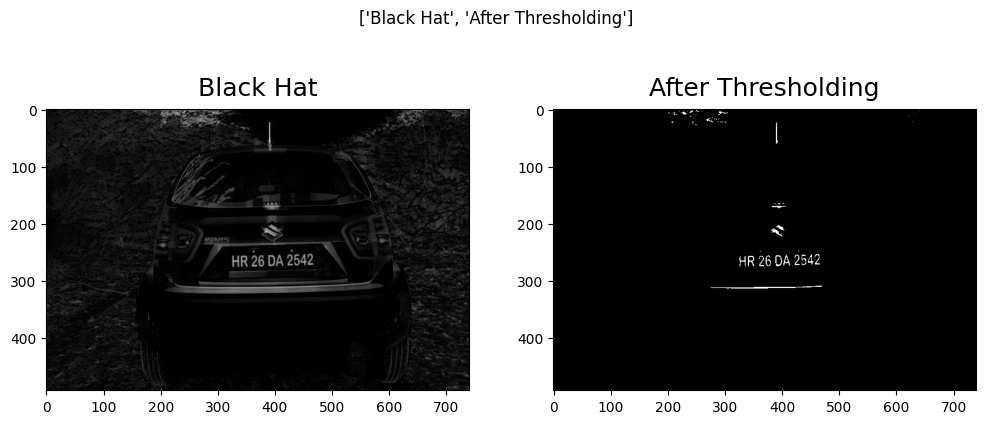

In [39]:
threshold, only_chars = cv2.threshold(img_car_blackhat, 127, 255, cv2.THRESH_BINARY)

imgsArray = [img_car_blackhat, only_chars]
titlesArray = ['Black Hat', 'After Thresholding']
showMultipleImages(imgsArray, titlesArray, (12, 10), 2, 1)

# Referências

* https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html
* https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756
* https://pyimagesearch.com/2021/04/28/opencv-morphological-operations/#:~:text=Morphological%20operations%20are%20simple%20transformations,as%20well%20as%20decrease%20them.
* https://homepages.inf.ed.ac.uk/rbf/HIPR2/close.htm
* https://www.mathworks.com/help/images/morphological-dilation-and-erosion.html